In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv("../IR - 21.csv")
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [3]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [4]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
167048,"Inner Race (0.021"")",0.021,0.186394,-0.034516
178998,"Inner Race (0.021"")",0.021,0.752075,-0.089373
174234,"Inner Race (0.021"")",0.021,0.151065,-0.126765
108512,Normal,0.000,0.040263,0.033900
161620,"Inner Race (0.021"")",0.021,0.263957,-0.174636
102612,Normal,0.000,-0.030041,0.107658
52703,Normal,0.000,0.076145,0.010273
176696,"Inner Race (0.021"")",0.021,0.268018,0.073553
74681,Normal,0.000,0.008553,0.119164
166253,"Inner Race (0.021"")",0.021,-0.101928,0.002055


In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
y = y.astype('int')

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
classifier.score(X_test, y_test)

1.0

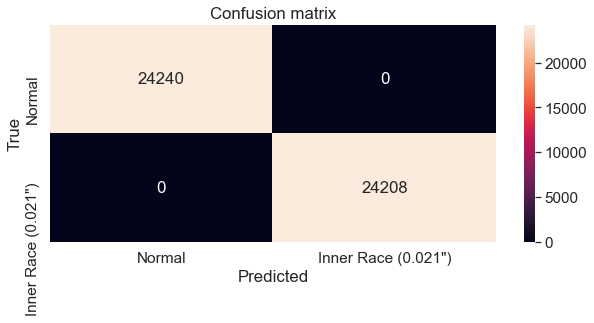

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.021")']  
columns = ['Normal','Inner Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     24240
Inner Race (0.021")       1.00      1.00      1.00     24208

           accuracy                           1.00     48448
          macro avg       1.00      1.00      1.00     48448
       weighted avg       1.00      1.00      1.00     48448

